In [1]:
from src import utils
from omegaconf import OmegaConf
import matplotlib.pylab as plt
from src.train_model import get_prediction, evaluate_model
from src.error_analysis import error_analysis
from xgboost import plot_importance
import matplotlib.pyplot as plt
import matplotlib as mpl

# Config file
cfg = OmegaConf.load("..\config\main.yaml")

# Load data
data = utils.load_data(cfg)

# Load model
model = utils.load_model(data, cfg)

# Return model predictions
prediction = get_prediction(model, data)

# Return evaluation
results = evaluate_model(prediction, data)

# Create a DataFrame of predictions and true values
df_preds = data['y_test'].assign(y_pred=prediction)

# Extract the true values and predicted values as separate variables
y_true = df_preds['net_sales']
y_pred = df_preds['y_pred']

# Calculate the errors (residuals) between the true and predicted values
errors = y_true - y_pred

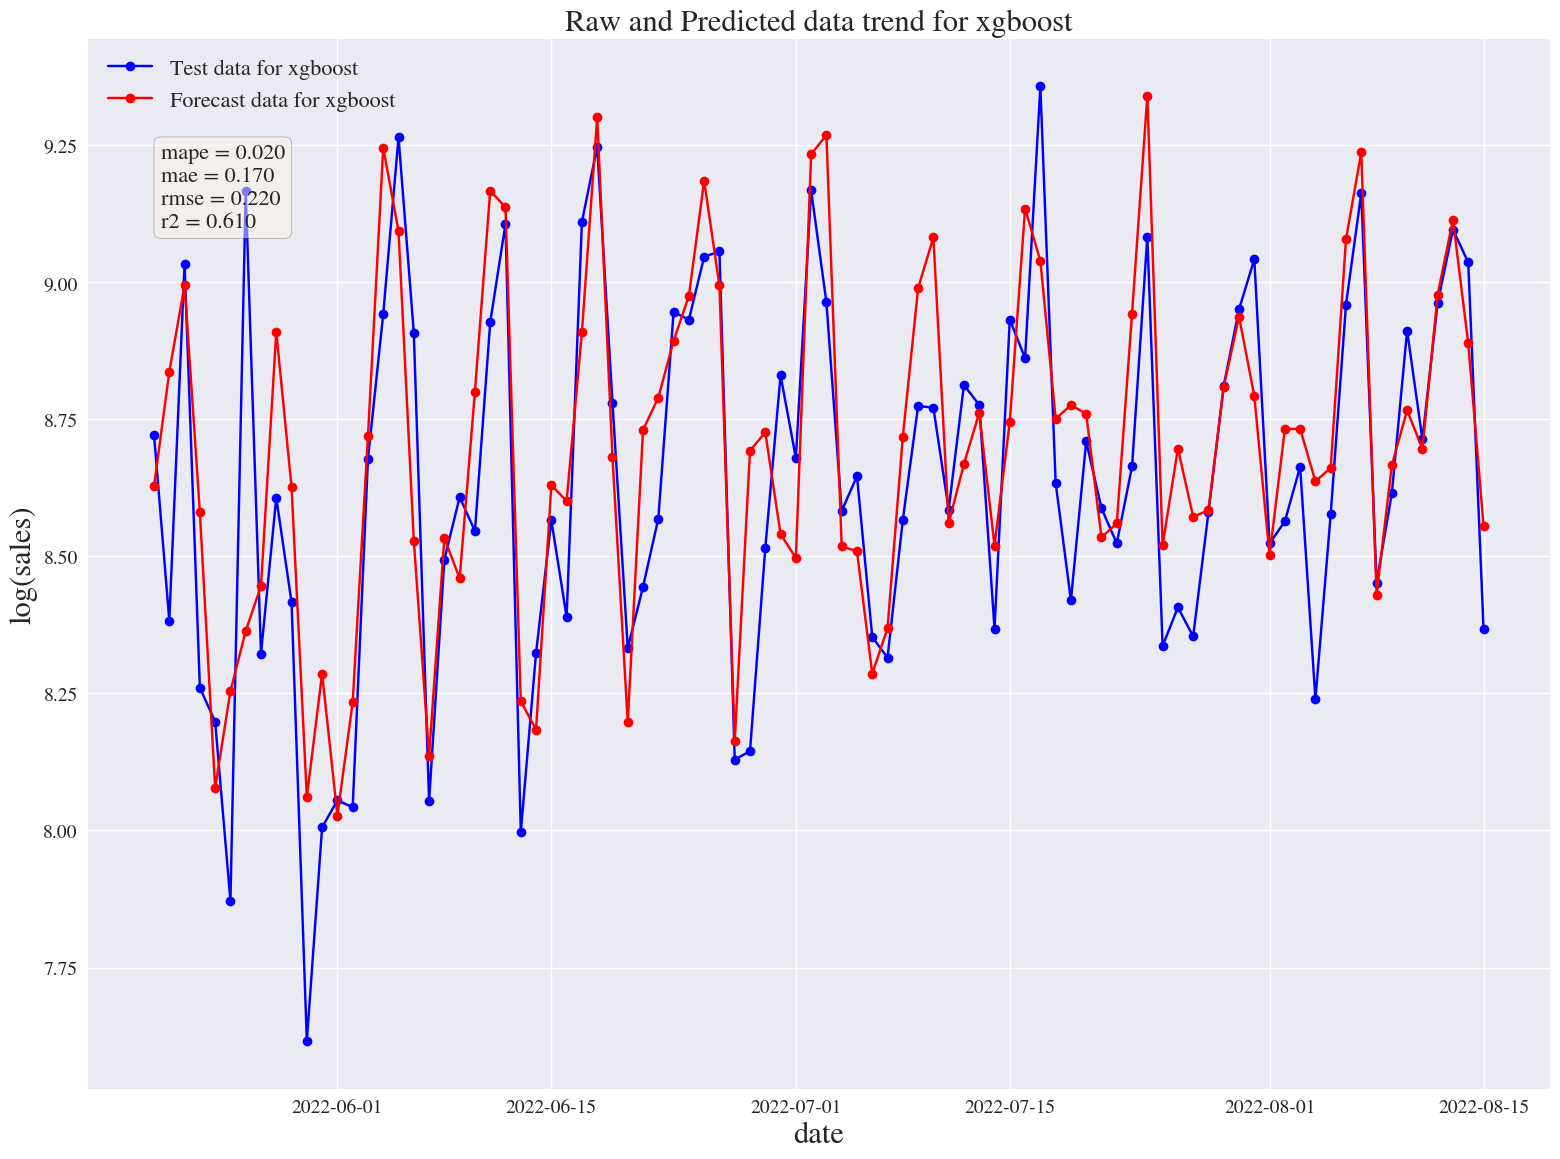

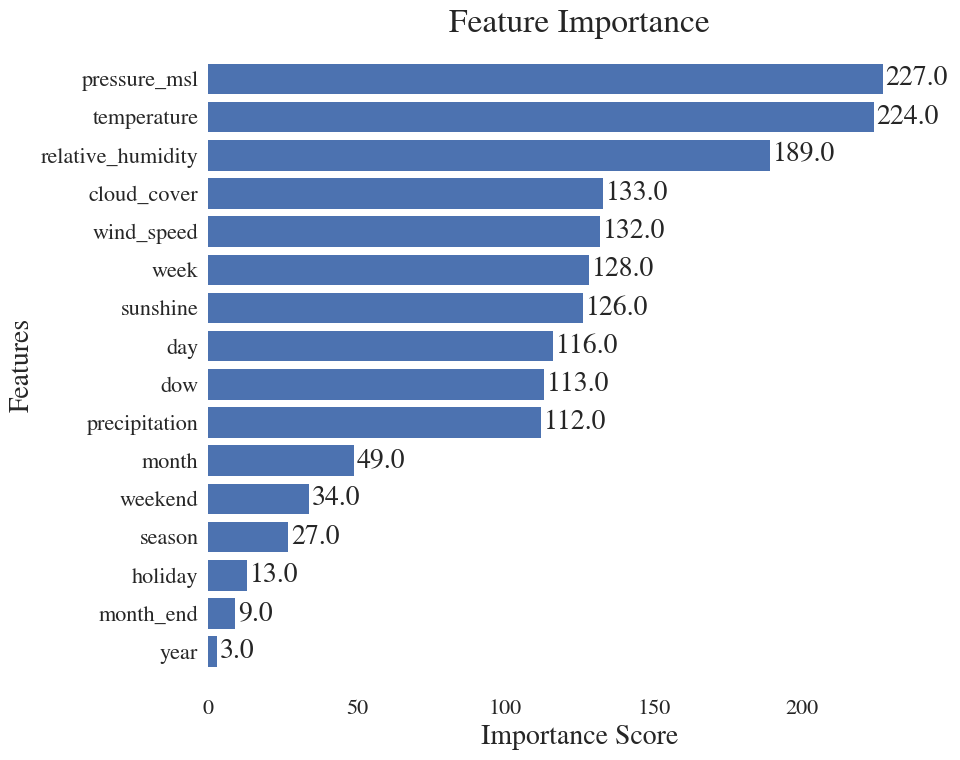

Number of errors: 88
Mean of errors: -0.0645
Standard deviation of errors: 0.2086
Quantiles of errors: 25%=-0.2155, 50%=-0.0528, 75%=0.0552
Min/Max errors: -0.5480/0.8021
Number of outliers: 1

Outliers:
>> 2022-05-26: 9.166


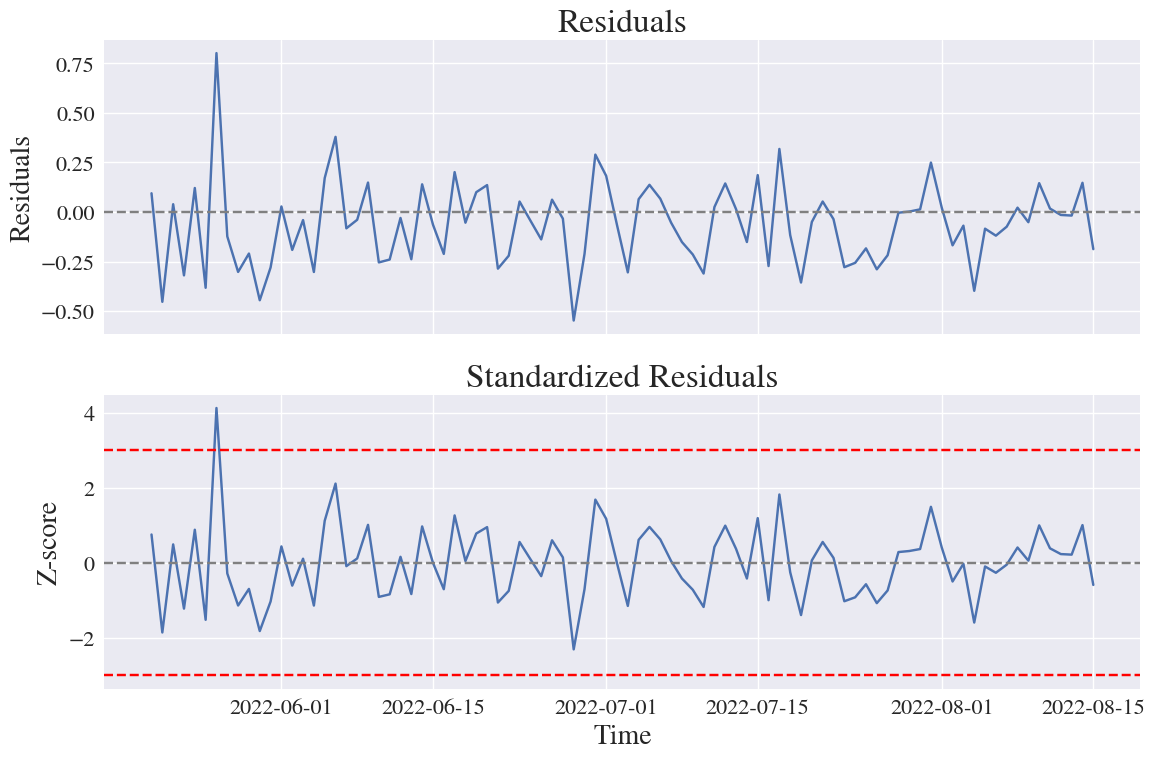

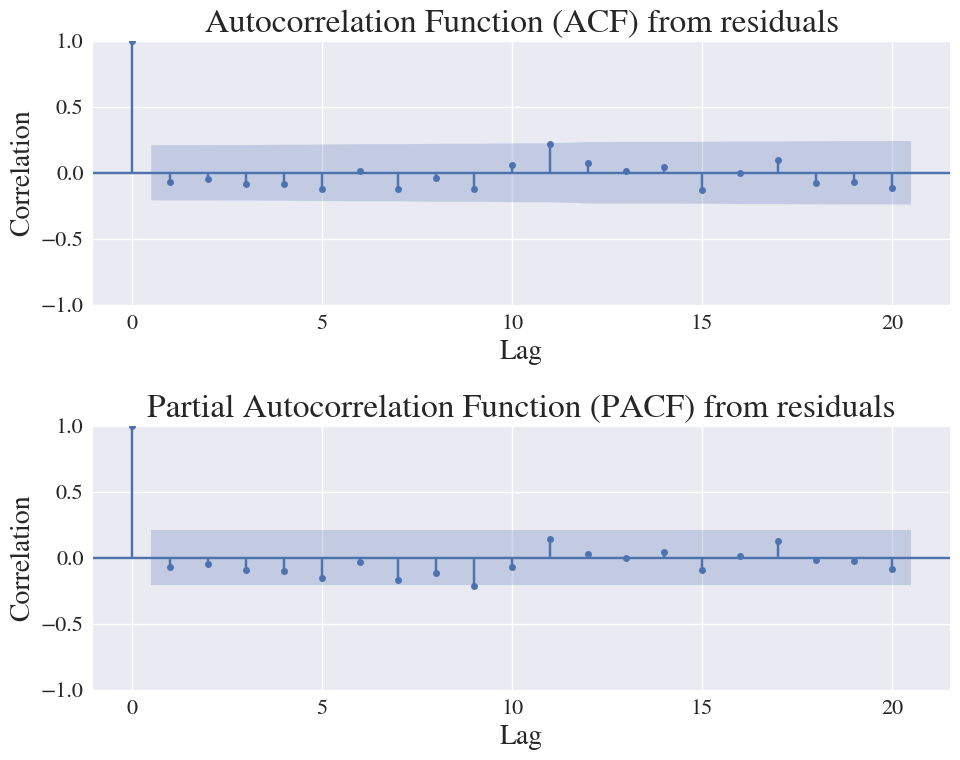

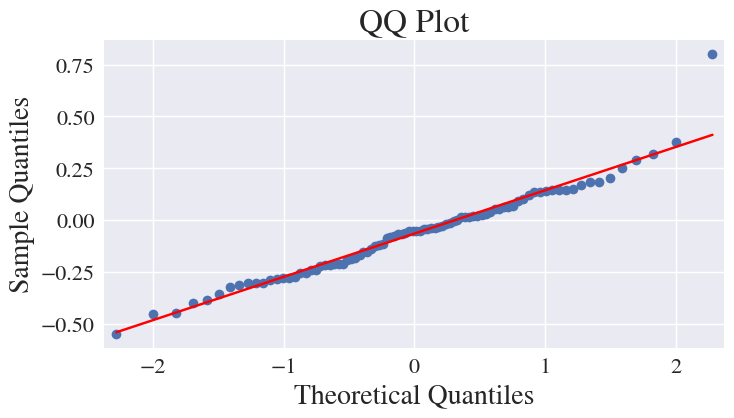

Top 3 highest absolute error values:
2022-05-26: 0.802
2022-06-28: 0.548
2022-05-21: 0.453


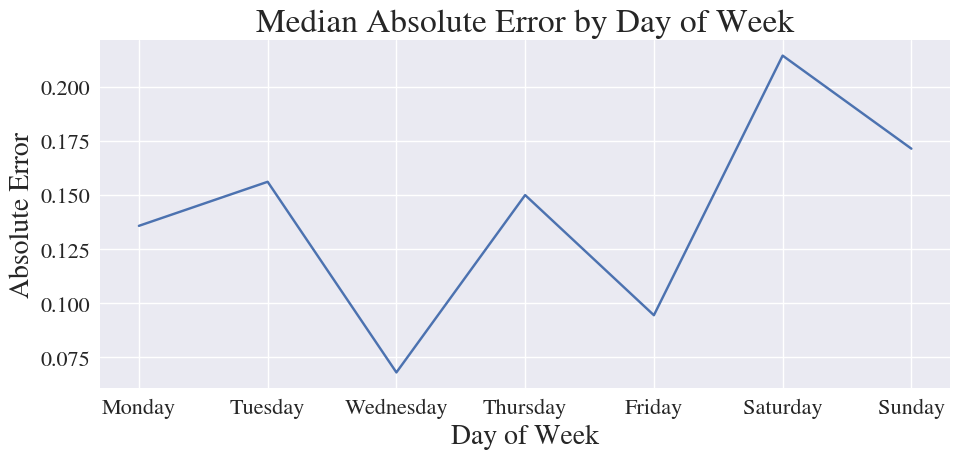

In [3]:
error_analysis(prediction, data, results, model)